In [69]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#Model ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Project Houses prices Prediction

### Data Info

In [70]:
df=pd.read_csv("/kaggle/input/global-house-purchase-decision-dataset/global_house_purchase_dataset.csv")
df.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


In [71]:
for col in df.columns:
  pct_missing= np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))


property_id - 0%
country - 0%
city - 0%
property_type - 0%
furnishing_status - 0%
property_size_sqft - 0%
price - 0%
constructed_year - 0%
previous_owners - 0%
rooms - 0%
bathrooms - 0%
garage - 0%
garden - 0%
crime_cases_reported - 0%
legal_cases_on_property - 0%
customer_salary - 0%
loan_amount - 0%
loan_tenure_years - 0%
monthly_expenses - 0%
down_payment - 0%
emi_to_income_ratio - 0%
satisfaction_score - 0%
neighbourhood_rating - 0%
connectivity_score - 0%
decision - 0%


In [72]:
df=df[df['country']=='USA']
df.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
16,17,USA,San Francisco,Townhouse,Unfurnished,3770,1889678,2017,0,2,...,82500,1352109,30,6400,537569,0.10,7,7,5,1
20,21,USA,Los Angeles,Farmhouse,Semi-Furnished,5975,2984423,1974,2,8,...,53130,2489069,15,11005,495354,0.41,3,7,6,0
37,38,USA,Chicago,Apartment,Unfurnished,1412,702803,1961,5,1,...,91680,510843,15,5470,191960,0.05,1,2,3,0
39,40,USA,Houston,Studio,Fully-Furnished,2029,1017204,1972,1,5,...,65800,463477,10,14585,553727,0.08,10,6,6,1
42,43,USA,New York,Townhouse,Unfurnished,2498,1250360,2010,4,6,...,18775,659956,30,18520,590404,0.22,9,5,6,0


#### We will remove irrelevant variables and avoid model cheating.

In [73]:
df = df.drop(columns=['property_id',
                    'city'
                    ,'loan_amount'
                    ,'emi_to_income_ratio'
                    ,'customer_salary'
                    ,'down_payment'
                    ,'monthly_expenses'
                    ,'loan_tenure_years',
                        'legal_cases_on_property',
                        'crime_cases_reported',
                        'decision',
                        'satisfaction_score',
                        'neighbourhood_rating',
                        'connectivity_score',
                        'previous_owners'])

In [74]:
df.head()

,country,property_type,furnishing_status,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
16,USA,Townhouse,Unfurnished,3770,1889678,2017,2,1,0,1
20,USA,Farmhouse,Semi-Furnished,5975,2984423,1974,8,8,0,0
37,USA,Apartment,Unfurnished,1412,702803,1961,1,1,0,1
39,USA,Studio,Fully-Furnished,2029,1017204,1972,5,5,0,1
42,USA,Townhouse,Unfurnished,2498,1250360,2010,6,4,0,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15281 entries, 16 to 199990
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             15281 non-null  object
 1   property_type       15281 non-null  object
 2   furnishing_status   15281 non-null  object
 3   property_size_sqft  15281 non-null  int64 
 4   price               15281 non-null  int64 
 5   constructed_year    15281 non-null  int64 
 6   rooms               15281 non-null  int64 
 7   bathrooms           15281 non-null  int64 
 8   garage              15281 non-null  int64 
 9   garden              15281 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.3+ MB


In [76]:
df.describe()

,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
count,15281.000000,1.528100e+04,15281.000000,15281.000000,15281.000000,15281.000000,15281.000000
mean,3206.320987,1.603146e+06,1991.610039,4.526471,2.766311,0.495845,0.496761
std,1605.879143,8.029633e+05,18.472247,2.284731,1.833275,0.499999,0.500006
min,400.000000,1.961140e+05,1960.000000,1.000000,1.000000,0.000000,0.000000
25%,1825.000000,9.114060e+05,1976.000000,3.000000,1.000000,0.000000,0.000000
50%,3203.000000,1.600616e+06,1991.000000,5.000000,2.000000,0.000000,0.000000
75%,4599.000000,2.299338e+06,2008.000000,7.000000,4.000000,1.000000,1.000000
max,6000.000000,3.003693e+06,2023.000000,8.000000,8.000000,1.000000,1.000000


In [77]:
df.shape

(15281, 10)

In [78]:
df.value_counts()

country  property_type  furnishing_status  property_size_sqft  price    constructed_year  rooms  bathrooms  garage  garden
USA      Apartment      Fully-Furnished    401                 204105   1973              3      2          0       0         1
         Studio         Unfurnished        5894                2943549  1984              8      1          0       1         1
                                           5825                2911779  1970              3      3          1       1         1
                                           5829                2910579  1998              7      6          1       0         1
                                           5839                2917064  1986              1      1          1       0         1
                                                                                                                             ..
         Farmhouse      Unfurnished        5504                2754711  1986              3      1          1

                    property_size_sqft     price  constructed_year     rooms  \
property_size_sqft            1.000000  0.999993         -0.015685 -0.005392   
price                         0.999993  1.000000         -0.015681 -0.005358   
constructed_year             -0.015685 -0.015681          1.000000  0.018356   
rooms                        -0.005392 -0.005358          0.018356  1.000000   
bathrooms                     0.004483  0.004499          0.015415  0.620617   
garage                       -0.004894 -0.004927         -0.001447  0.003433   
garden                       -0.005618 -0.005625         -0.010337  0.015328   

                    bathrooms    garage    garden  
property_size_sqft   0.004483 -0.004894 -0.005618  
price                0.004499 -0.004927 -0.005625  
constructed_year     0.015415 -0.001447 -0.010337  
rooms                0.620617  0.003433  0.015328  
bathrooms            1.000000 -0.003023  0.008991  
garage              -0.003023  1.000000 -0.0010

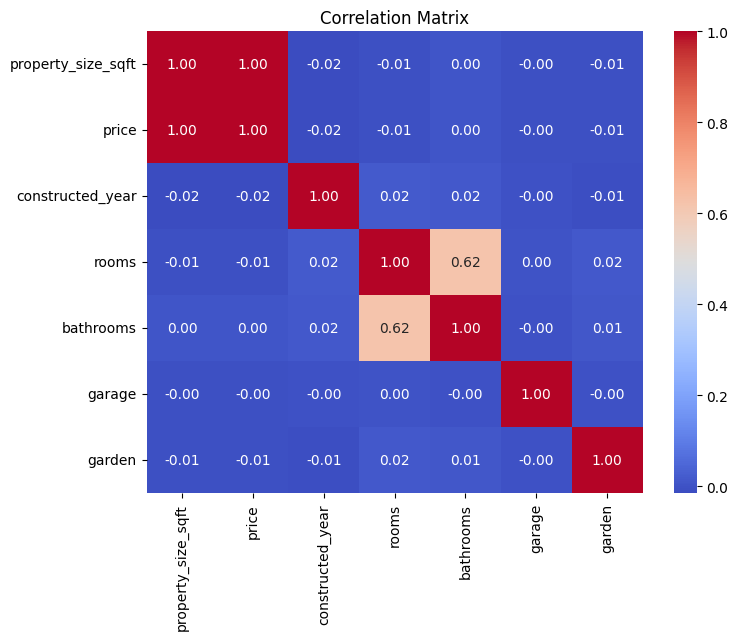

In [79]:
correlation_matrix = df.drop(columns=['country', 'property_type', 'furnishing_status']).corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Mechine Learning

In [80]:
df = pd.get_dummies(df, columns=['property_type', 'furnishing_status'])
df.head()

,country,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden,property_type_Apartment,property_type_Farmhouse,property_type_Independent House,property_type_Studio,property_type_Townhouse,property_type_Villa,furnishing_status_Fully-Furnished,furnishing_status_Semi-Furnished,furnishing_status_Unfurnished
16,USA,3770,1889678,2017,2,1,0,1,False,False,False,False,True,False,False,False,True
20,USA,5975,2984423,1974,8,8,0,0,False,True,False,False,False,False,False,True,False
37,USA,1412,702803,1961,1,1,0,1,True,False,False,False,False,False,False,False,True
39,USA,2029,1017204,1972,5,5,0,1,False,False,False,True,False,False,True,False,False
42,USA,2498,1250360,2010,6,4,0,0,False,False,False,False,True,False,False,False,True


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15281 entries, 16 to 199990
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   country                            15281 non-null  object
 1   property_size_sqft                 15281 non-null  int64 
 2   price                              15281 non-null  int64 
 3   constructed_year                   15281 non-null  int64 
 4   rooms                              15281 non-null  int64 
 5   bathrooms                          15281 non-null  int64 
 6   garage                             15281 non-null  int64 
 7   garden                             15281 non-null  int64 
 8   property_type_Apartment            15281 non-null  bool  
 9   property_type_Farmhouse            15281 non-null  bool  
 10  property_type_Independent House    15281 non-null  bool  
 11  property_type_Studio               15281 non-null  bool  
 12  propert

In [82]:
X = df.drop(['price', 'country'], axis=1)
y = df['price']

In [83]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Linear Regresion Model and Visualitation

In [84]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
print("Linier Regresion  R² : ", r2_score(y_test, y_pred_lr))
print("Linier Regresion RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linier Regresion  R² :  0.9999869003698408
Linier Regresion RMSE :  2911.3657632314143


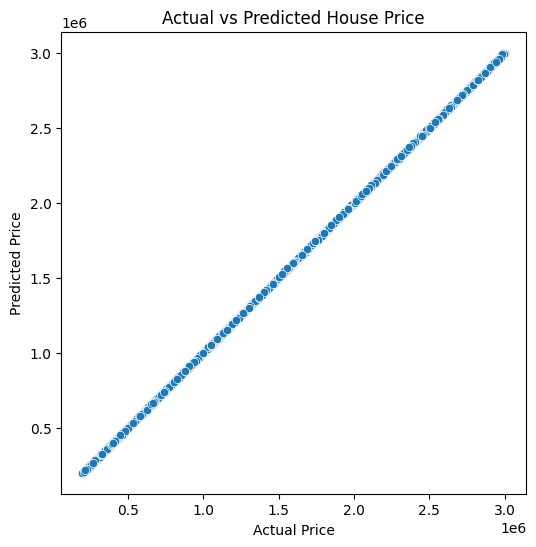

In [85]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=lr.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Decision Tree Model and Visualitation

In [86]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
print("Decision Tree  R² : ", r2_score(y_test, y_pred_dt))
print("Decision Tree RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Decision Tree  R² :  0.9999722379173577
Decision Tree RMSE :  4238.315424109217


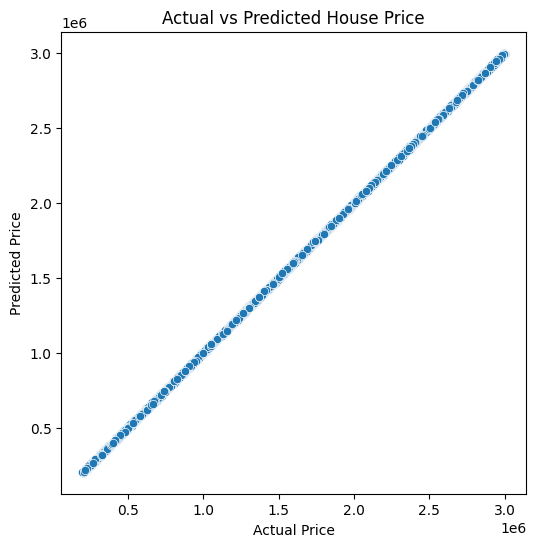

In [87]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=dt.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Random Forest Model and Visualitation

In [88]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print("Random Forest  R² : ", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Random Forest  R² :  0.9999840715417709
Random Forest RMSE :  4238.315424109217


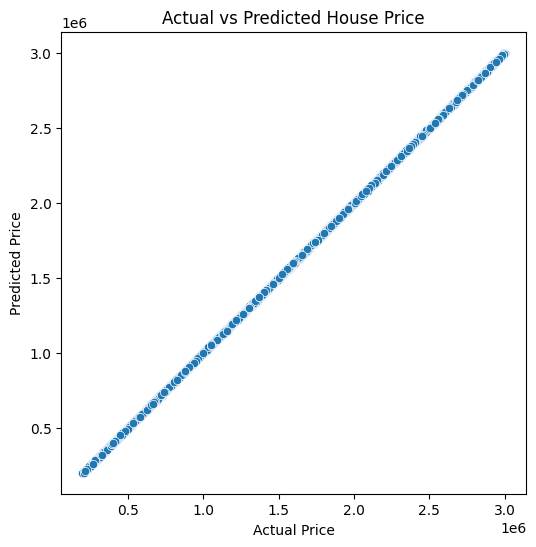

In [89]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=rf.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Gradient Boost Model and Visualization

In [90]:
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)
print("Gradient Boost  R² : ", r2_score(y_test, y_pred_gb))
print("Gradient Boost RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Gradient Boost  R² :  0.9999364239539068
Gradient Boost RMSE :  4238.315424109217


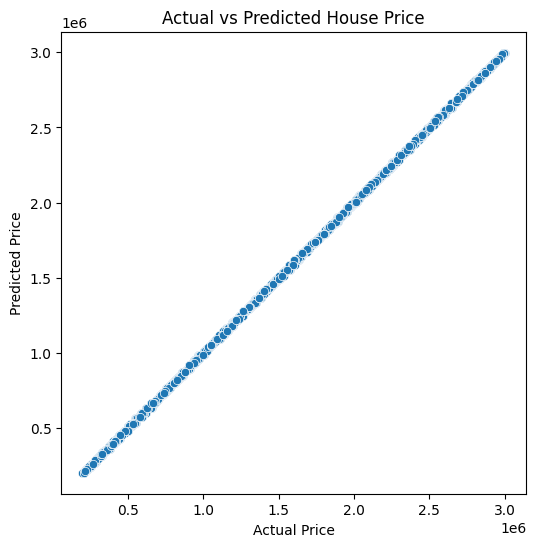

In [91]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=gb.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Result : $R^2$ and $RMSE$

In [92]:
result=pd.DataFrame({'metode':['lr', 'dt', 'rf', 'gb'],
       'R²':[ r2_score(y_test, y_pred_lr),
             r2_score(y_test, y_pred_dt),
             r2_score(y_test, y_pred_rf),
            r2_score(y_test, y_pred_gb)],
       'RMSE':[np.sqrt(mean_squared_error(y_test, y_pred_lr)),
               np.sqrt(mean_squared_error(y_test, y_pred_dt)),
              np.sqrt(mean_squared_error(y_test, y_pred_rf)),
              np.sqrt(mean_squared_error(y_test, y_pred_gb))]})


In [93]:
result

,metode,R²,RMSE
0,lr,0.999987,2911.365763
1,dt,0.999972,4238.315424
2,rf,0.999984,3210.362870
3,gb,0.999936,6413.779287
